<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/KDE_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

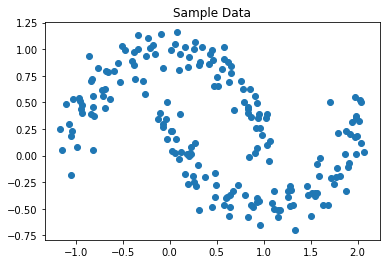

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# データ生成。 今回はラベルは不要なのでデータだけ取得する。
data, _ = make_moons(
    n_samples=200,
    noise=0.1,
    random_state=0
)

fig = plt.figure(facecolor="w")
ax = fig.add_subplot(111, title="Sample Data")
ax.scatter(data[:, 0], data[:, 1])
plt.show()

In [ ]:
from scipy.stats import gaussian_kde
# これはエラーは出ないが誤り
kde = gaussian_kde(data.T)

# 密度推定した結果を得ようとするとエラーになる。
print(kde.pdf([0, 0]))
# ValueError: points have dimension 1, dataset has dimension 200

[0.21265101]


In [ ]:
# 点(1, 1)での値
print(kde.evaluate([1, 1]))
# [0.03921808]
# 4点(-0.5, 0), (0, 1), (0.5, 1), (1, 0) での値
print(kde.evaluate([[-0.5, 0, 0.5, 1], [0, 1, 1, 0]]))
# [0.07139624 0.2690079  0.2134083  0.16500181]

[0.03921808]
[0.07139624 0.2690079  0.2134083  0.16500181]


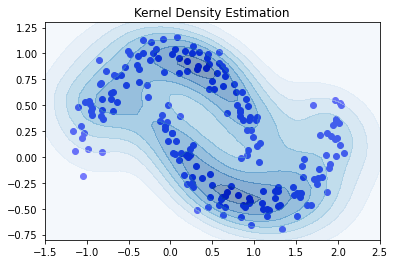

In [ ]:
# 等高線を引く領域のx座標とy座標のリストを用意する
x = np.linspace(-1.5, 2.5, 41)
y = np.linspace(-0.8, 1.3, 22)
# メッシュに変換
xx, yy = np.meshgrid(x, y)
# kdeが受け取れる形に整形
meshdata = np.vstack([xx.ravel(), yy.ravel()])
# 高さのデータ計算
z = kde.evaluate(meshdata)

# 可視化
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(111, title="Kernel Density Estimation")
ax.scatter(data[:, 0], data[:, 1], c="b")
ax.contourf(xx, yy, z.reshape(len(y), len(x)), cmap="Blues", alpha=0.5)
plt.show()